In [1]:
data = np.genfromtxt ('data.csv', delimiter=",")

In [2]:
X, y= data[:,:-1], data[:,-1] 

In [3]:
from sklearn.preprocessing import scale
X_scale = scale(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y)

In [5]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
#X_train, y_train = sm.fit_sample(X_train, y_train)

# 随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15,random_state=1)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)     

0.73999999999999999

Normalized confusion matrix
[[ 0.86127168  0.13872832]
 [ 0.53246753  0.46753247]]


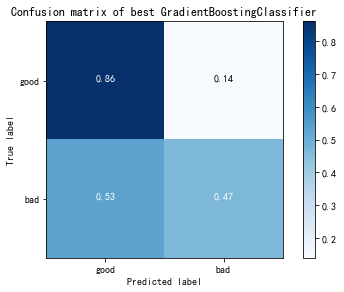

In [7]:
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')

## 极限随机树

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf,X_scale, y)
scores.mean()                     

0.68202334070597548

In [10]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf,X_scale, y)
scores.mean()                             


0.75800351249453046

In [11]:
clf = ExtraTreesClassifier(n_estimators=200, max_features=20,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf,X_scale, y)
scores.mean()

0.7580184975394556

Normalized confusion matrix
[[ 0.83815029  0.16184971]
 [ 0.46753247  0.53246753]]


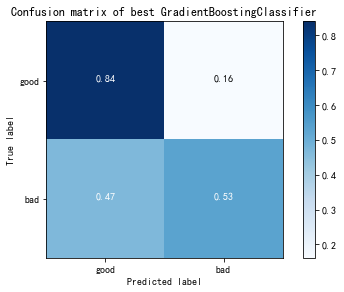

In [12]:
clf.fit(X_train, y_train)
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')

# AdaBoost

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(n_estimators=1000, learning_rate= 0.10)
scores = cross_val_score(clf,X_scale, y)
scores.mean()   

0.75900451349553144

Normalized confusion matrix
[[ 0.93063584  0.06936416]
 [ 0.57142857  0.42857143]]


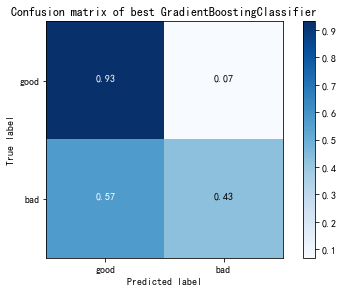

In [14]:
clf.fit(X_train, y_train)
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')

# 梯度树提升（Gradient Tree Boosting）

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)                 


0.78800000000000003

Normalized confusion matrix
[[ 0.92485549  0.07514451]
 [ 0.51948052  0.48051948]]


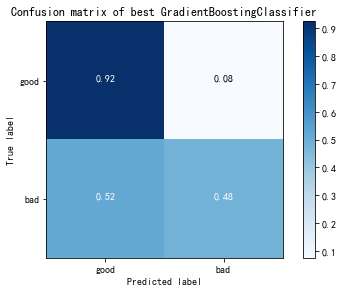

In [16]:
clf.fit(X_train, y_train)
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')

# 投票分类器

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_scale, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.02) [Logistic Regression]
Accuracy: 0.76 (+/- 0.03) [Random Forest]
Accuracy: 0.73 (+/- 0.04) [naive Bayes]
Accuracy: 0.77 (+/- 0.03) [Ensemble]


Normalized confusion matrix
[[ 0.89595376  0.10404624]
 [ 0.45454545  0.54545455]]


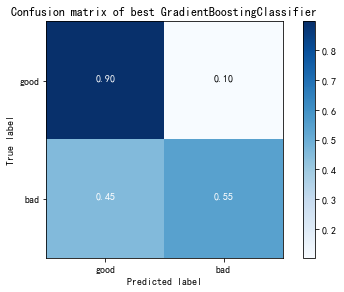

In [18]:
eclf.fit(X_train, y_train)
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, eclf.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')

# 网格搜索下的投票分类器

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.78800000000000003

Normalized confusion matrix
[[ 0.87283237  0.12716763]
 [ 0.4025974   0.5974026 ]]


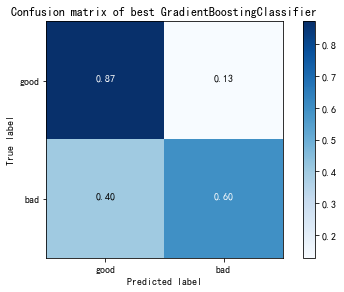

In [20]:
from plot_comfusion_matrix import *
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid.predict(X_test))    
classs = ['good','bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best GradientBoostingClassifier')